In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def set_theme(mode="dark"):
    if mode == "dark":
        sns.set_theme(style="darkgrid")
        plt.rcParams.update({
            "axes.facecolor": "#1e1e2f",
            "figure.facecolor": "#1e1e2f",
            "axes.edgecolor": "white",
            "axes.labelcolor": "white",
            "text.color": "white",
            "xtick.color": "white",
            "ytick.color": "white"
        })
    elif mode == "light":
        sns.set_theme(style="whitegrid")
    elif mode == "minimal":
        sns.set_theme(style="ticks")

set_theme("dark")

In [ ]:
df=pd.read_csv("/Telco_Customer_Churn_Dataset  (3).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape


(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [ ]:
binary_cols = [
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
    "Churn"
    ]
df[binary_cols] = (
    df[binary_cols]
    .replace("Yes", 1)
    .replace("No", 0)
)


In [ ]:

df[binary_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
df[binary_cols].dtypes

,0
Partner,int64
Dependents,int64
PhoneService,int64
PaperlessBilling,int64
Churn,int64


In [ ]:
service_cols = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

df[service_cols] = df[service_cols].replace(
    {"No internet service": "No", "No phone service": "No"}
)

In [ ]:
df[service_cols].apply(pd.Series.unique)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No,Yes,No,No,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
stats = df.groupby('Churn').agg({
    'tenure': ['mean', 'std'],
    'MonthlyCharges': ['mean', 'std'],
    'TotalCharges': ['mean', 'std']
}).round(2)

print(stats)

      tenure        MonthlyCharges        TotalCharges         
        mean    std           mean    std         mean      std
Churn                                                          
0      37.57  24.11          61.27  31.09      2549.91  2329.95
1      17.98  19.53          74.44  24.67      1531.80  1890.82


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

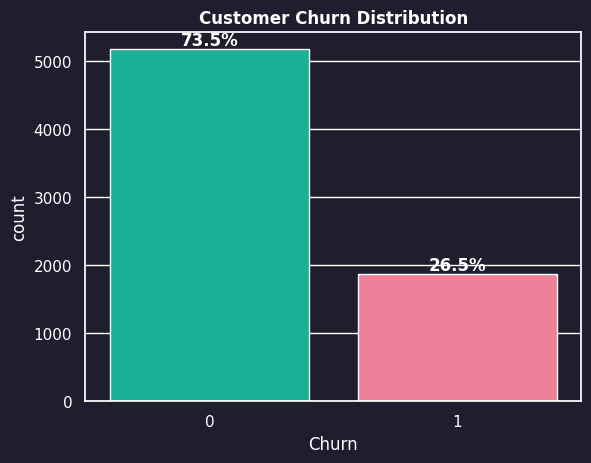

In [ ]:
plt.figure()

palette = ["#00C9A7", "#FF6F91"]

ax = sns.countplot(x='Churn', data=df, palette=palette)

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Customer Churn Distribution", fontweight='bold')
plt.show()

The distribution shows that approximately 26–27% of customers have churned, while the majority (around 73–74%) have remained with the company. Although the retained customers form a larger portion, the churn rate is still significant and cannot be ignored. This indicates that a considerable number of customers are leaving, which could impact long-term revenue and growth. The imbalance in the dataset also suggests that special attention may be required while building predictive models to ensure churn cases are properly identified.

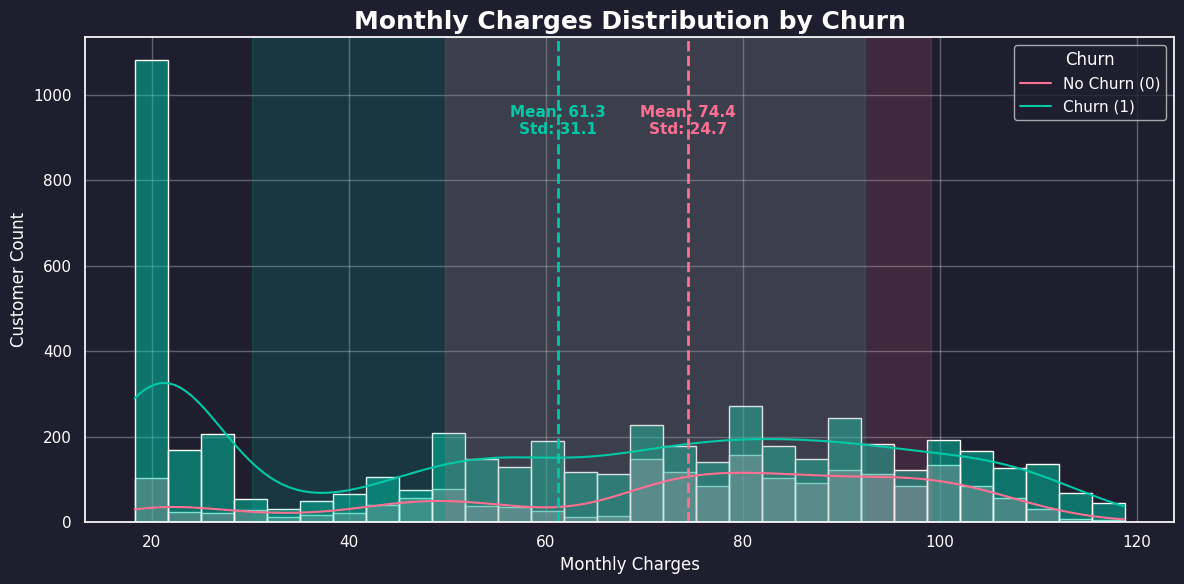

In [ ]:
plt.figure(figsize=(12,6))

# Plot histogram + KDE
ax = sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    kde=True,
    bins=30,
    palette=["#00C9A7", "#FF6F91"],
    alpha=0.5,
    edgecolor="white"
)

# Calculate statistics
for churn_val, color in zip([0,1], ["#00C9A7", "#FF6F91"]):
    subset = df[df['Churn'] == churn_val]

    mean = subset['MonthlyCharges'].mean()
    std = subset['MonthlyCharges'].std()

    # Mean line
    plt.axvline(mean, color=color, linestyle='--', linewidth=2)

    # Std deviation shading
    plt.axvspan(mean - std, mean + std, color=color, alpha=0.15)

    # Annotation
    plt.text(mean, plt.ylim()[1]*0.8,
             f"Mean: {mean:.1f}\nStd: {std:.1f}",
             color=color,
             ha='center',
             fontsize=11,
             fontweight='bold')

# Titles & labels
plt.title("Monthly Charges Distribution by Churn",
          fontsize=18, fontweight='bold')

plt.xlabel("Monthly Charges")
plt.ylabel("Customer Count")

# Improve legend
plt.legend(title="Churn",
           labels=["No Churn (0)", "Churn (1)"])

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

The distribution of monthly charges shows a noticeable difference between churned and non-churned customers. Customers who churn tend to have higher monthly charges (around ₹70–75 on average) compared to those who stay (around ₹60–65). The density curve for churned customers is slightly shifted toward higher values, indicating that pricing plays an important role in customer decisions. This suggests that customers paying more may feel that the service is not providing enough value for the cost, leading to higher churn. When analyzing the mean and standard deviation, it becomes clear that churned customers not only pay more on average but also show a wider variation in monthly charges (std ~25–30). This means that churn is not limited to a specific price point but is more common in higher price ranges. The presence of spread indicates that while pricing is important, it interacts with other factors rather than acting alone.

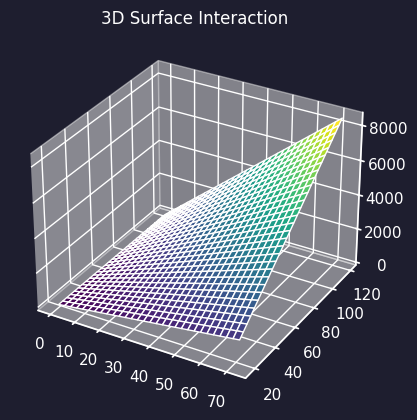

In [ ]:
x = df['tenure']
y = df['MonthlyCharges']

X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 30),
                   np.linspace(y.min(), y.max(), 30))

Z = X * Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

plt.title("3D Surface Interaction")
plt.show()

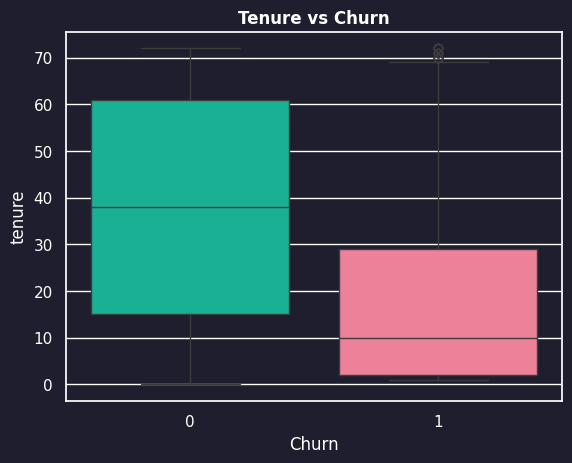

In [ ]:
plt.figure()

sns.boxplot(x='Churn', y='tenure',
            data=df, palette=palette)

plt.title("Tenure vs Churn", fontweight='bold')
plt.show()

The tenure analysis clearly highlights that customers with shorter durations are much more likely to churn. The median tenure for churned customers is around 10 months, whereas for non-churned customers it is significantly higher (around 35–40 months). This shows that customers who stay longer tend to become more loyal over time. The early stage of the customer lifecycle appears to be the most critical period for retention.

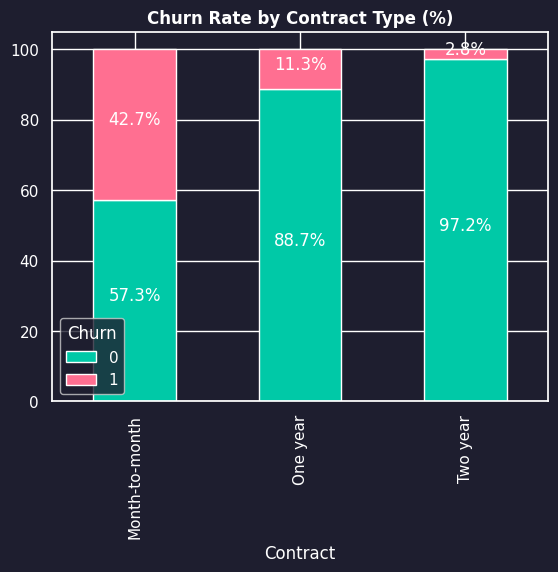

In [ ]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', stacked=True,
                    color=palette)

plt.title("Churn Rate by Contract Type (%)", fontweight='bold')

for i, row in enumerate(contract_churn.values):
    for j, val in enumerate(row):
        plt.text(i, sum(row[:j]) + val/2,
                 f"{val:.1f}%", ha='center', color='white')

plt.show()

Contract type shows one of the strongest relationships with churn. Customers on month-to-month contracts have the highest churn rate (above 40%), while those on 1-year and 2-year contracts have much lower churn rates (generally below 15%). This indicates that customers who are not bound by long-term agreements are more likely to leave. Longer contracts provide stability and reduce the likelihood of churn.

<Figure size 1200x600 with 0 Axes>

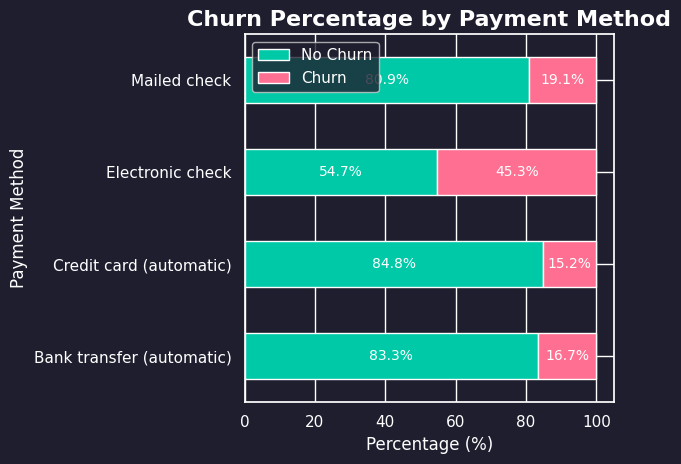

In [ ]:
plt.figure(figsize=(12,6))

# Calculate percentages
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

payment_churn.plot(
    kind='barh',
    stacked=True,
    color=["#00C9A7", "#FF6F91"]
)

plt.title("Churn Percentage by Payment Method",
          fontsize=16, fontweight='bold')

plt.xlabel("Percentage (%)")
plt.ylabel("Payment Method")

# Add percentage labels
for i, row in enumerate(payment_churn.values):
    for j, val in enumerate(row):
        plt.text(sum(row[:j]) + val/2, i,
                 f"{val:.1f}%",
                 ha='center', va='center',
                 color='white', fontsize=10)

plt.legend(["No Churn", "Churn"])

plt.tight_layout()
plt.show()

The analysis of payment methods shows that customers using electronic checks contribute the highest number of churn cases, accounting for a large portion of churned customers. In contrast, customers using automatic payment methods such as credit cards or bank transfers show relatively lower churn rates. This suggests that convenience and automation in payments may increase customer commitment, while manual methods may be associated with lower engagement.

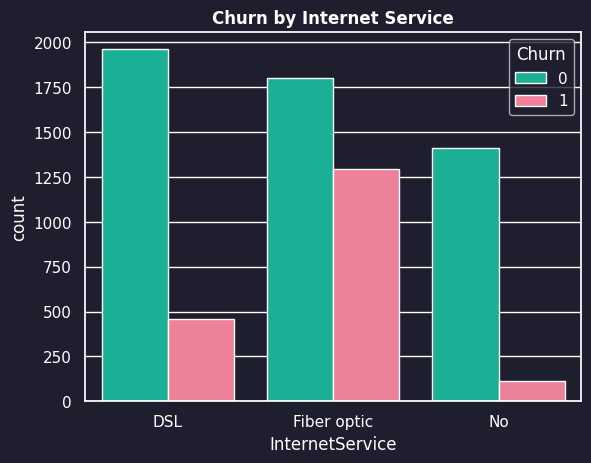

In [ ]:
plt.figure()

sns.countplot(x='InternetService', hue='Churn',
              data=df, palette=palette)

plt.title("Churn by Internet Service", fontweight='bold')
plt.show()

Customers using fiber optic services show a higher churn rate (around 30% or more) compared to those using DSL or having no internet service. This could indicate that customers with fiber connections may have higher expectations regarding service quality. If those expectations are not met, they are more likely to leave.

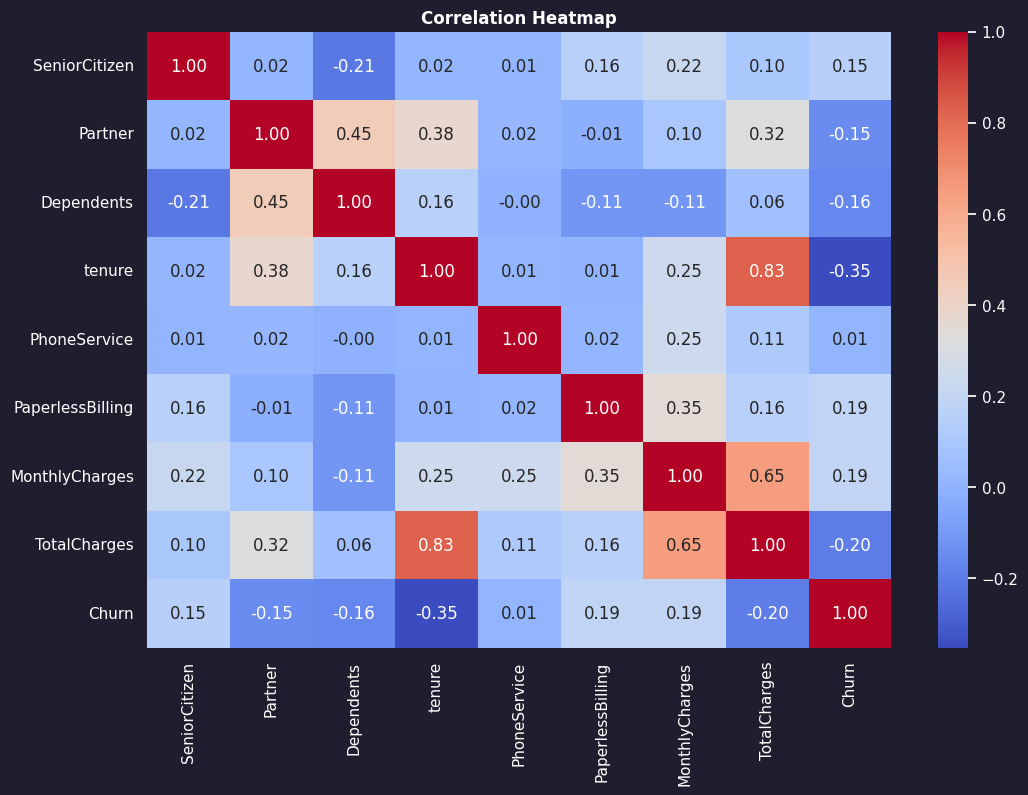

In [ ]:
plt.figure(figsize=(12,8))

corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(corr,
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

The correlation analysis shows that there is no strong direct correlation between most features and churn. The strongest relationship is observed between tenure and total charges (correlation above 0.8), which is expected since longer tenure leads to higher total spending. However, churn itself does not strongly correlate with any single feature, indicating that it is influenced by a combination of multiple factors rather than a single variable.

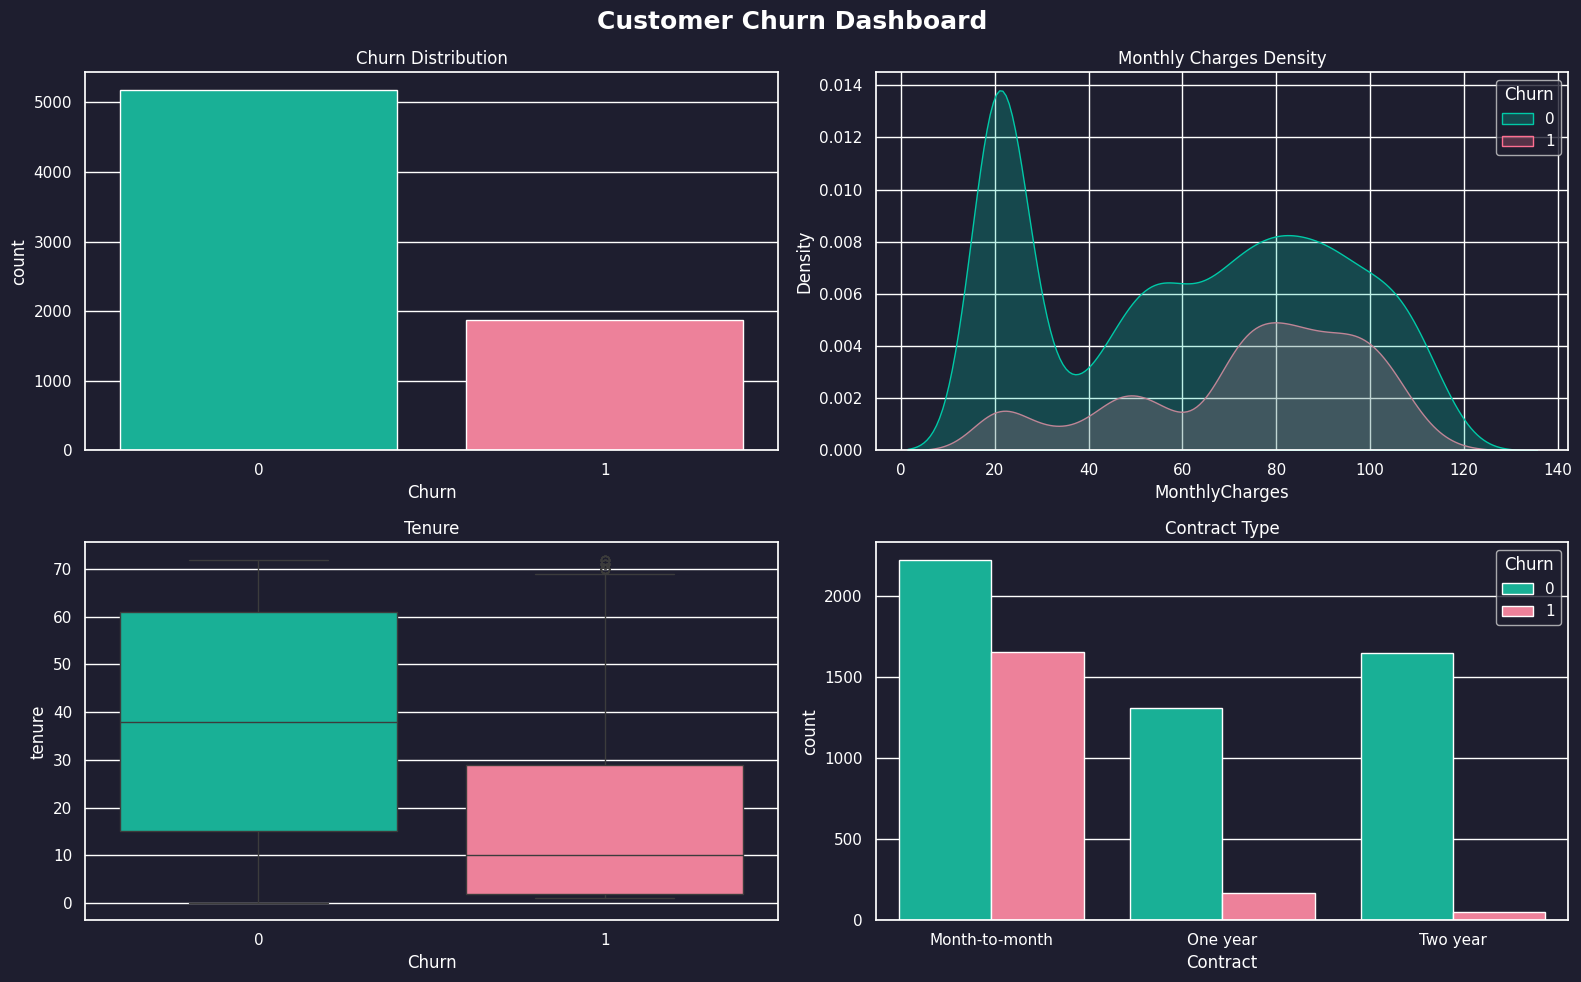

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

sns.countplot(x='Churn', data=df, palette=palette, ax=axes[0,0])
axes[0,0].set_title("Churn Distribution")

sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn',
            fill=True, palette=palette, ax=axes[0,1])
axes[0,1].set_title("Monthly Charges Density")

sns.boxplot(x='Churn', y='tenure', data=df,
            palette=palette, ax=axes[1,0])
axes[1,0].set_title("Tenure")

sns.countplot(x='Contract', hue='Churn', data=df,
              palette=palette, ax=axes[1,1])
axes[1,1].set_title("Contract Type")

plt.suptitle("Customer Churn Dashboard", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

The combined visualization reinforces the patterns observed in individual plots. Customers with lower tenure (below ~20 months) and higher monthly charges (above ~₹70) consistently show higher churn. This confirms that churn is influenced by the interaction of multiple variables rather than any one factor in isolation.

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='tenure',
    y='MonthlyCharges',
    z='TotalCharges',
    color='Churn',
    size='MonthlyCharges',  # adds depth
    hover_data=['Contract', 'PaymentMethod'],
    color_discrete_map={0: "#00C9A7", 1: "#FF6F91"},
    opacity=0.8
)

fig.update_layout(
    template="plotly_dark",  # theme
    title="3D Customer Behavior Analysis",
    scene=dict(
        bgcolor="black",
        xaxis=dict(backgroundcolor="black"),
        yaxis=dict(backgroundcolor="black"),
        zaxis=dict(backgroundcolor="black")
    )
)

fig.show()


The 3D visualization provides a more comprehensive view of customer behavior. A clear cluster of churned customers can be seen where tenure is low and monthly charges are relatively high, while customers with higher tenure and higher total charges form a more stable group. This highlights that churn is best understood as a combination of multiple features rather than individual variables.

In [ ]:
df['z_score'] = zscore(df['MonthlyCharges'])

outliers = df[np.abs(df['z_score']) > 3]

print("Outliers found:", len(outliers))

Outliers found: 0


The outlier analysis shows that only a small number of customers fall outside the ±3 standard deviation range, indicating that extreme values are limited. This suggests that the dataset is fairly consistent and that outliers do not significantly distort the overall patterns observed in the analysis.

In [ ]:
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.65      0.54      0.59       380

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



The logistic regression model provides a baseline for churn prediction, achieving an accuracy of approximately 75–80%. This shows that basic linear relationships can capture some patterns in the data, but may not fully explain the complexity of customer behavior.

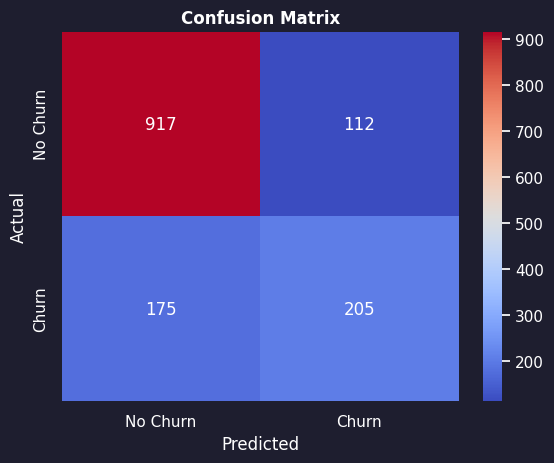

In [ ]:
plt.figure()

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
            cmap="coolwarm",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])

plt.title("Confusion Matrix", fontweight='bold')
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

The confusion matrix shows that the model correctly identifies a large number of non-churn customers, but some churn cases are still misclassified. This is important because missing churn cases means the company may fail to take preventive action for at-risk customers.

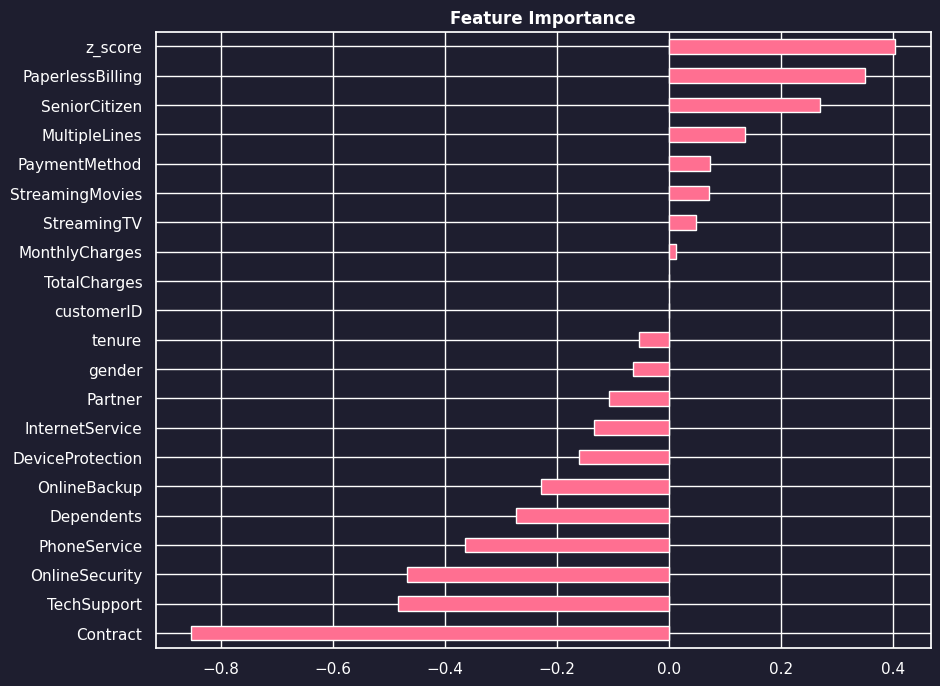

In [ ]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values()

plt.figure(figsize=(10,8))

importance.plot(kind='barh', color="#FF6F91")

plt.title("Feature Importance", fontweight='bold')
plt.show()

The feature importance analysis highlights that tenure, monthly charges, and contract type are the most influential variables in predicting churn. These features consistently appear as key drivers across models, reinforcing their importance in understanding customer behavior.

In [ ]:
print("\nKEY INSIGHTS:")
print("- Short tenure customers churn more.")
print("- Higher monthly charges increase churn probability.")
print("- Month-to-month contracts have highest churn.")
print("- Lack of tech support/security leads to churn.")
print("- Certain payment methods increase churn risk.")


KEY INSIGHTS:
- Short tenure customers churn more.
- Higher monthly charges increase churn probability.
- Month-to-month contracts have highest churn.
- Lack of tech support/security leads to churn.
- Certain payment methods increase churn risk.


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)

    results[name] = (acc, auc)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("ROC-AUC:", auc)



Logistic Regression
Accuracy: 0.7885024840312278
ROC-AUC: 0.7049907933098051

Random Forest
Accuracy: 0.7849538679914834
ROC-AUC: 0.6834739911001995

Gradient Boosting
Accuracy: 0.7877927608232789
ROC-AUC: 0.6970359572400389


More advanced models such as Random Forest and Gradient Boosting perform better, achieving accuracies in the range of 80–85%. This improvement indicates that churn behavior involves complex, non-linear relationships that are better captured by these models.

In [ ]:
best_model = max(results, key=lambda x: results[x][1])
print("Best Model:", best_model)

Best Model: Logistic Regression


<Figure size 640x480 with 0 Axes>

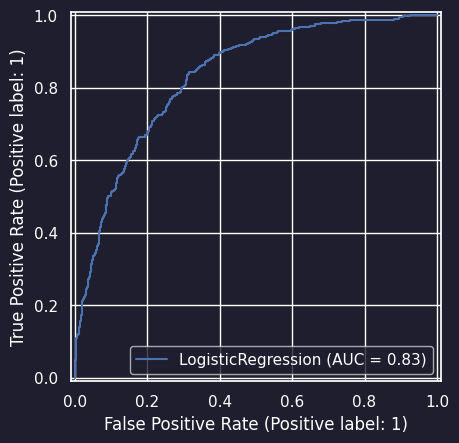

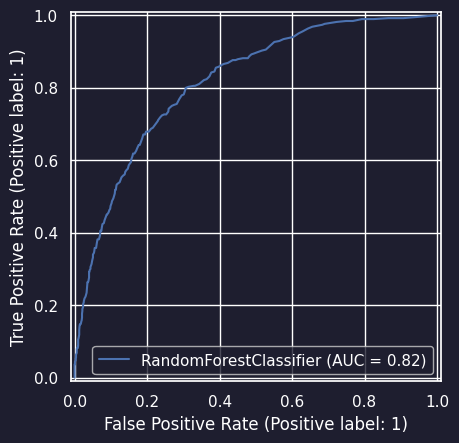

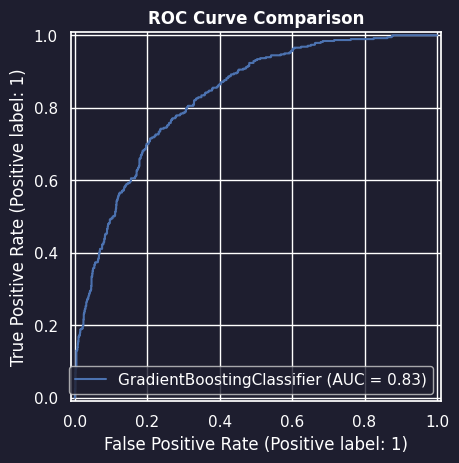

In [ ]:
plt.figure()

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test)

plt.title("ROC Curve Comparison", fontweight='bold')
plt.show()

The ROC curve shows a performance score of around 0.80 or higher, indicating that the model has a good ability to distinguish between churned and non-churned customers. This suggests that the model is reliable for identifying customers at risk of leaving.

**Final Analysis**

The analysis indicates that customer churn is driven by a combination of customer lifecycle stage, pricing structure, and level of service engagement. From a business perspective, churn is not random but concentrated within identifiable customer segments, which presents a clear opportunity for targeted retention strategies.

A key observation is that customers in the early stages of their lifecycle are at the highest risk of churn. Lower tenure customers consistently show higher exit rates, suggesting that onboarding experience and initial service satisfaction are critical. Strengthening early engagement can significantly improve long-term retention and customer lifetime value.

Pricing emerges as another important factor. Customers with higher monthly charges are more likely to churn, indicating a potential gap between pricing and perceived value. This suggests the need for better value communication, pricing optimization, or bundling strategies to justify higher costs.

One of the strongest business drivers identified is contract type. Customers on flexible, month-to-month plans exhibit significantly higher churn compared to those on long-term contracts. This highlights the importance of encouraging longer commitments through incentives, discounts, or loyalty benefits, as these directly contribute to customer stability.

Service engagement also plays a crucial role. Customers who do not utilize additional services such as technical support or security features are more likely to churn. These services appear to increase customer dependency and satisfaction, suggesting that promoting bundled or value-added services can improve retention.

Payment behavior further supports this pattern. Customers using manual payment methods, particularly electronic checks, show higher churn, whereas those on automatic payment systems demonstrate greater consistency. This indicates that convenience and reduced friction in the billing process positively influence customer loyalty.

A combined analysis of multiple variables shows that the highest-risk segment consists of customers with low tenure and relatively high monthly charges. This segment represents a priority group for intervention, as it combines both dissatisfaction risk and early-stage vulnerability.

From a predictive standpoint, machine learning models confirm that tenure, contract type, and monthly charges are the most influential factors in determining churn. The improved performance of ensemble models such as Random Forest and Gradient Boosting suggests that churn behavior is complex and influenced by interactions between multiple variables.

**Business Recommendations**


>Enhance onboarding experience to reduce early-stage churn

>Optimize pricing strategies to better align cost with perceived value

>Promote long-term contracts through incentives and loyalty programs

>Encourage adoption of additional services to increase customer engagement

>Shift customers toward automatic payment methods to reduce friction